In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
from Cores import Cores

from MEM_class import MEM
from MEMfuncs import MEM_func

In [2]:
coreNames = ['B16', 'B17','B18','B19','B20','B21','B22','B23','B26','B27','B28','B29','B30']

DEPy = [False,False,True,True,True,False,True,True,False,False,False,False,False]
ECMy = [True,False,True,False,False,True,False,False,False,False,False,False,False]
DEP_Names = ['B18','B19','B20','B22','B23']
ECM_Names = ['B16','B18','B21']
ECM_DEPCores = []


In [19]:
idx_chosen = [7]


for i in idx_chosen:
    core = coreNames[i]
    dens = pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=core, index=False)
    d18O = pd.read_excel('Depth_d18O__Bcores.xlsx', sheet_name=core, index=False)
    
    if DEPy[i]:
        DEP = pd.read_excel('DepthDEP__BcoresClean.xlsx', sheet_name=core, index=False)
    else:
        DEP = []
    
    if ECMy[i]:
        ECM = pd.read_excel('DepthECM__B16_B18_B21.xlsx', sheet_name=core, index=False)
    else:
        ECM = []
    
    volcWE = np.asarray(pd.read_excel('VolcanicEruptions__WE_Depth.xlsx', 'Sheet1', usecols=[core]))
    ECM_DEPCores.append(Cores(name=core, df_dens=dens, df_d18O = d18O, df_ECM = ECM, df_DEP = DEP, volcWE = volcWE))

    


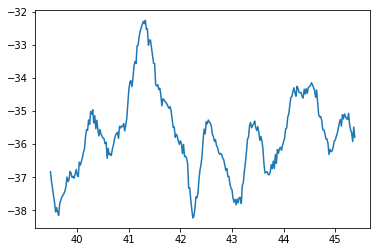

In [20]:
df_LT = ECM_DEPCores[0].getData_LakiToTambora(plotFig=False)[0]
plt.plot(df_LT['depth'],df_LT['d18O'])


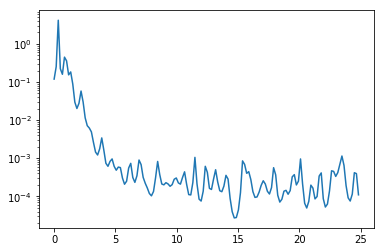

In [23]:
d18O_data = np.array(df_LT['d18O'])
depth_data = np.array(df_LT['depth'])

B23_MEM = MEM_func(d18O_data, depth_data, M=75)
plt.semilogy(B23_MEM[0][0],B23_MEM[0][1])